In [18]:
from preparing_script import data_processing_agrochem
import pandas as pd 
import numpy as np 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


подготовка данных из того что уже предобработанно

In [118]:
agrochemistry_total = pd.read_csv('полевые данные общая/ready_data/агрохимия_правленная_1.csv', sep = ';') #важно сомтреть чтобы была правленная агрохимия
agrochemistry_total["Год"] = agrochemistry_total["Год"].astype(str)
agrochemistry_total["GPS №"] = agrochemistry_total["GPS №"].astype(str)

agrochem_columns = ['Год', 'GPS №', 'Тип обработки', 'Глубина', 'повторность',
       'рН солевой вытяжки, ед. рН', 'рН водной вытяжки, ед. рН',
       'Фосфор (подвижная форма), мг/кг', 'Калий (подвижная форма), млн-1',
       'Общий азот, %', 'Органический углерод, %']

# общий датафрейм
agrochemistry_main = agrochemistry_total[agrochemistry_total['Глубина'].isin(['0-10',"10-20","20-30"])][agrochem_columns] #можно будет добавить глубины 20-30
agrochemistry_main['GPS №'] = agrochemistry_main['GPS №'].astype(int)
agrochemistry_main.drop('повторность', axis = 1, inplace= True)
agrochemistry_main.dropna(axis = 0, inplace= True)

# разбивка по точкам на ПП
pp_points = [525,526,527,528,586,529, 584,585]
by_points = agrochemistry_main[agrochemistry_main["GPS №"].isin(pp_points)]
new_columns = ['Год', 'GPS №', 'Тип обработки', 'Глубина',
       'рН солевой вытяжки, ед. рН', 'рН водной вытяжки,\n ед. рН',
       'Фосфор (подвижная \n форма), мг/кг', 'Калий (подвижная \nформа), мг/кг',
       'Общий азот,\n %', 'Органический углерод,\n %']

agrochemistry_main.columns = new_columns

In [110]:
agrochemistry_main.columns

Index(['Год', 'GPS №', 'Тип обработки', 'Глубина',
       'рН солевой вытяжки, ед. рН', 'рН водной вытяжки,\n ед. рН',
       'Фосфор (подвижная \n форма), мг/кг',
       'Калий (подвижная \nформа), мг/кг', 'Общий азот, %',
       'Органический углерод, %'],
      dtype='object')

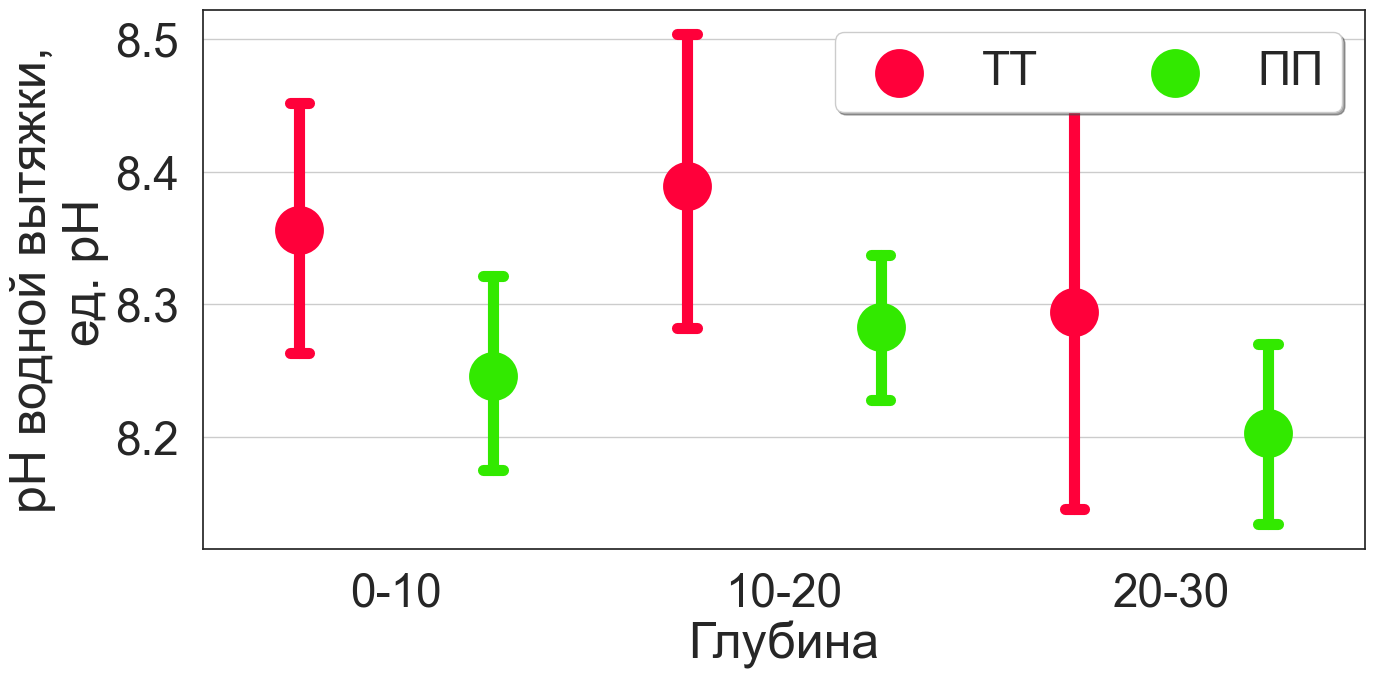

In [112]:
stats ,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'рН водной вытяжки,\n ед. рН', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/pH_вод_обработки.jpg')


In [74]:
stats

рН водной вытяжки, ед. рН                    
                                            std variation      mean
Тип обработки Глубина                                              
ПП            0-10                     0.214360  0.025599  8.245758
              10-20                    0.160649  0.019099  8.282727
              20-30                    0.177072  0.021151  8.202800
ТТ            0-10                     0.221894  0.025807  8.356111
              10-20                    0.275708  0.032071  8.389524
              20-30                    0.303004  0.035294  8.294000

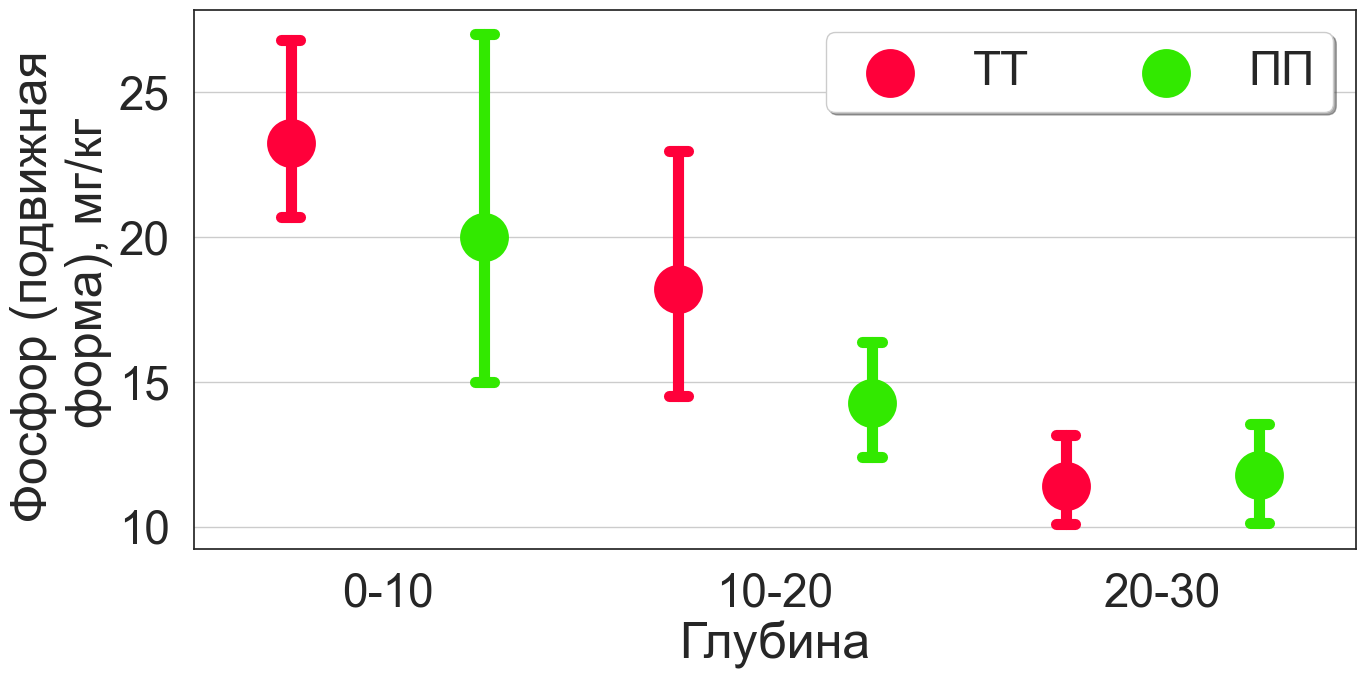

In [114]:
stats ,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Фосфор (подвижная \n форма), мг/кг', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/фосфор_обработки.jpg')


In [76]:
stats

Фосфор (подвижная форма), мг/кг                     
                                                  std variation       mean
Тип обработки Глубина                                                     
ПП            0-10                          17.464783  0.860647  19.982789
              10-20                          6.160291  0.425185  14.267293
              20-30                          4.797870  0.398701  11.790634
ТТ            0-10                           6.487447  0.271366  23.233092
              10-20                         10.227940  0.548862  18.185711
              20-30                          3.190320  0.270301  11.402649

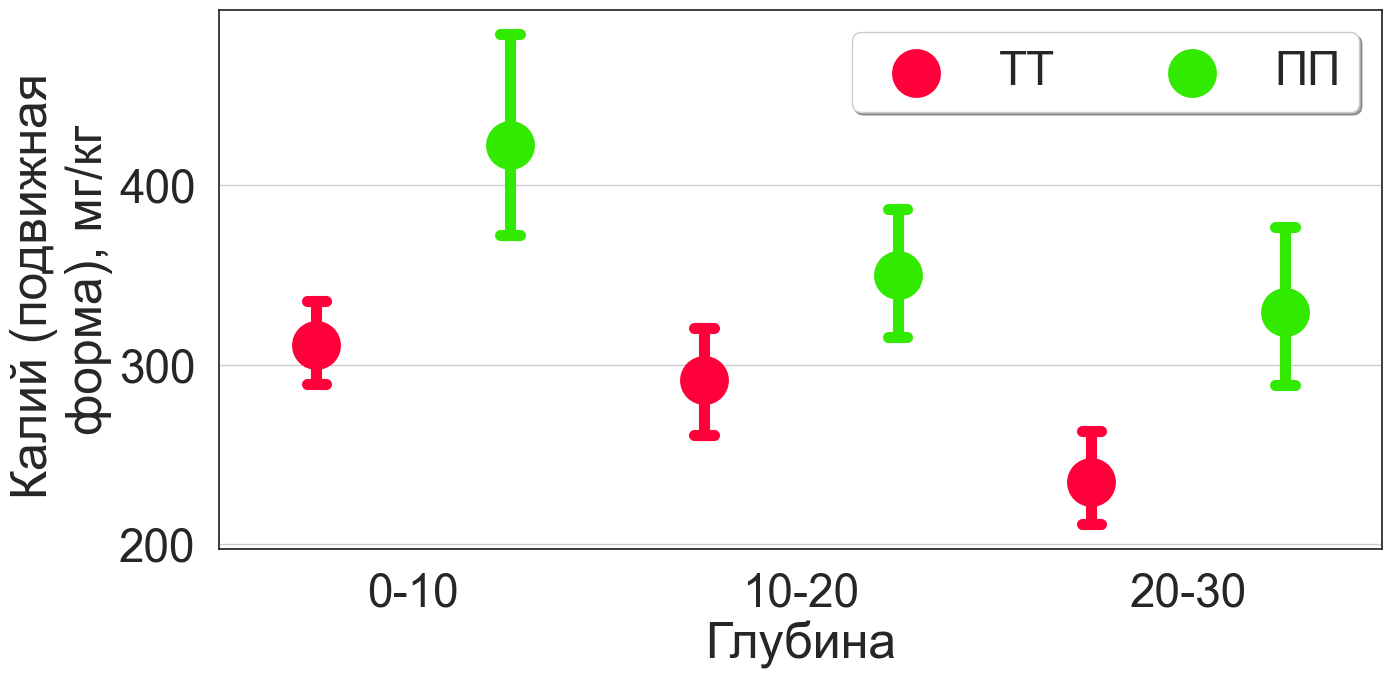

In [116]:
stats ,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Калий (подвижная \nформа), мг/кг', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/калий_обработки.jpg')


In [78]:
stats

Калий (подвижная форма), млн-1                      
                                                 std variation        mean
Тип обработки Глубина                                                     
ПП            0-10                        164.735828  0.383640  422.846028
              10-20                       112.135714  0.315694  349.779999
              20-30                       115.206880  0.342957  329.135457
ТТ            0-10                         52.871964  0.165167  311.092648
              10-20                        71.178987  0.238275  291.527019
              20-30                        52.265671  0.215172  234.665379

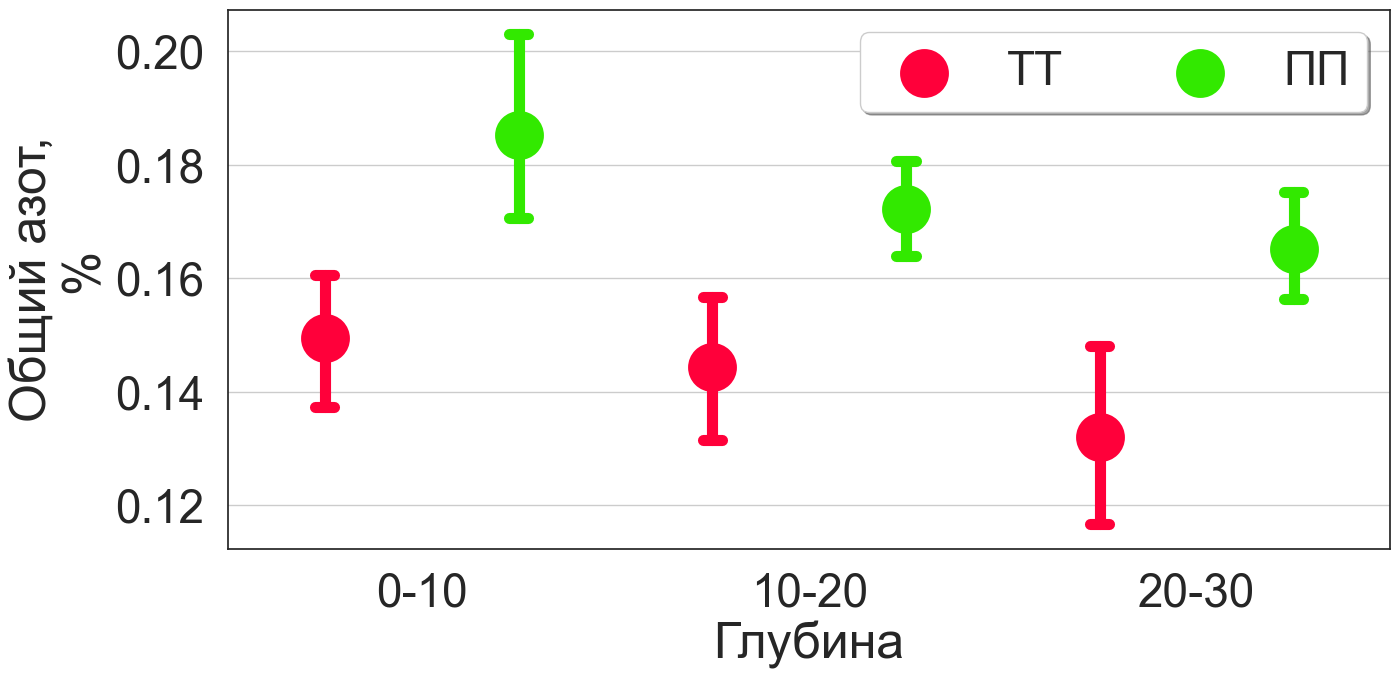

In [119]:
stats , fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Общий азот,\n %', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/азот_обработки.jpg')


In [80]:
stats

Общий азот, %                    
                                std variation      mean
Тип обработки Глубина                                  
ПП            0-10         0.047901  0.254762  0.185152
              10-20        0.025588  0.146392  0.172121
              20-30        0.024685  0.146404  0.165200
ТТ            0-10         0.026451  0.172011  0.149444
              10-20        0.029928  0.202426  0.144286
              20-30        0.031214  0.228448  0.132000

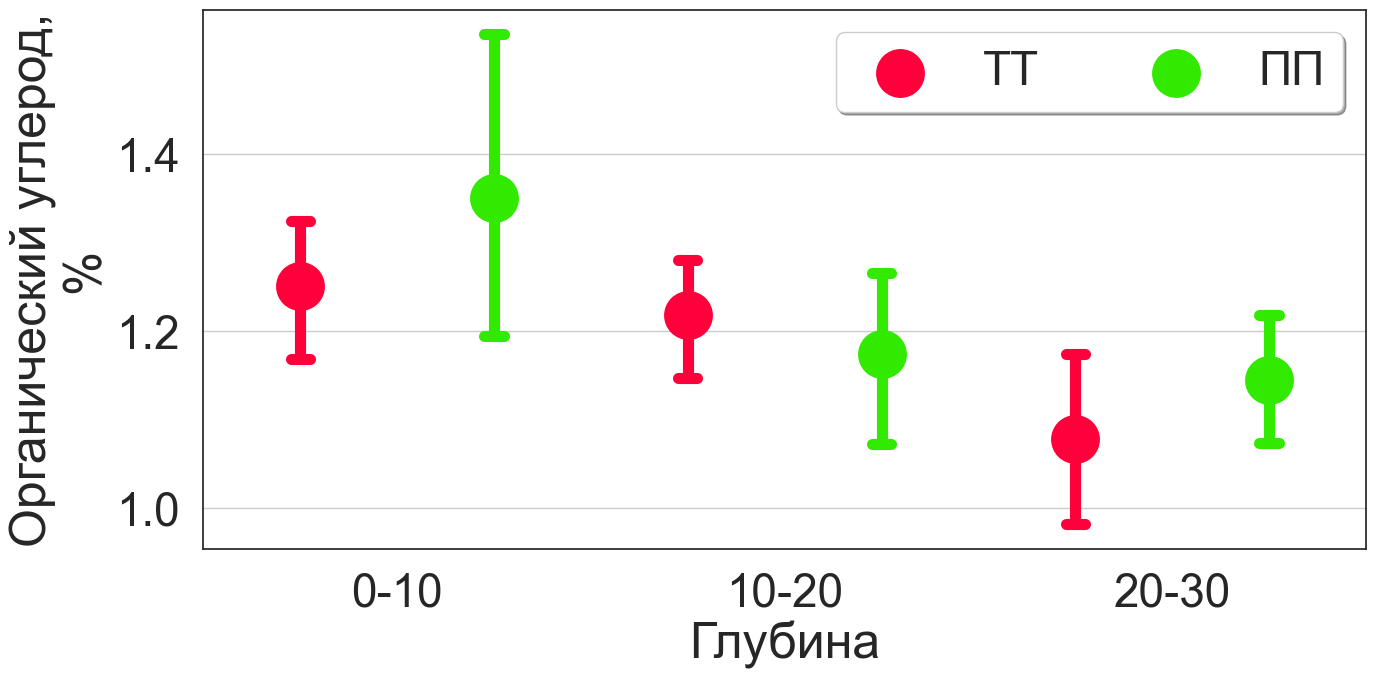

In [121]:
stats ,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Органический углерод,\n %', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/углерод_обработки.jpg')


In [82]:
stats

Органический углерод, %                    
                                          std variation      mean
Тип обработки Глубина                                            
ПП            0-10                   0.506985  0.369577  1.350852
              10-20                  0.287312  0.240996  1.173987
              20-30                  0.186345  0.159478  1.144863
ТТ            0-10                   0.179945  0.139736  1.251465
              10-20                  0.165052  0.132179  1.218601
              20-30                  0.207144  0.185524  1.078673